In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv('metacritic_18.07.2021_csv.csv')
df.head()

,titles,platforms,metascore,userscore,genre,date
0,Streets of Rage 4: Mr. X Nightmare,PC,88.0,tbd,action,"July 15, 2021"
1,Sniper Elite VR,PC,67.0,7.1,action,"July 8, 2021"
2,Sniper Elite VR,PlayStation 4,75.0,tbd,action,"July 8, 2021"
3,Boomerang X,PC,81.0,6.6,action,"July 8, 2021"
4,Boomerang X,Switch,78.0,6.3,action,"July 8, 2021"


In [5]:
df.shape

(30777, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30777 entries, 0 to 30776
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   titles     30777 non-null  object 
 1   platforms  30777 non-null  object 
 2   metascore  28486 non-null  float64
 3   userscore  25082 non-null  object 
 4   genre      30777 non-null  object 
 5   date       30777 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['platforms'].uniqueue()

array(['PC', 'PlayStation 4', 'Switch', 'Xbox One', 'Xbox Series X',
       'PlayStation 5',
       'iOS\n                                                                                    \xa0(Apple Arcade)',
       'iOS', 'Stadia', '3DS', 'PlayStation Vita', 'Wii U',
       'PlayStation 3', 'Xbox 360', 'PSP', 'DS', 'Wii', 'PlayStation 2',
       'Game Boy Advance', 'GameCube', 'Xbox', 'PlayStation', 'Dreamcast',
       'Nintendo 64'], dtype=object)

In [11]:
df.loc[df['platforms'] == 'iOS\n                                                                                    \xa0(Apple Arcade)','platforms'] = 'iOS (Apple Arcade)'

In [12]:
df['metascore'].value_counts()

73.0    1105
75.0    1078
80.0    1067
74.0    1059
78.0    1053
76.0    1052
77.0    1043
72.0    1033
70.0    1015
79.0     993
71.0     964
68.0     940
81.0     936
69.0     913
82.0     830
83.0     799
67.0     763
66.0     750
65.0     742
84.0     708
63.0     695
64.0     687
85.0     611
62.0     593
61.0     579
59.0     552
86.0     504
58.0     496
60.0     485
87.0     406
56.0     402
88.0     397
57.0     382
54.0     371
55.0     363
53.0     325
89.0     315
90.0     242
50.0     237
51.0     228
52.0     214
91.0     182
92.0     124
93.0     104
94.0      81
95.0      25
96.0      24
97.0      14
98.0       5
Name: metascore, dtype: int64

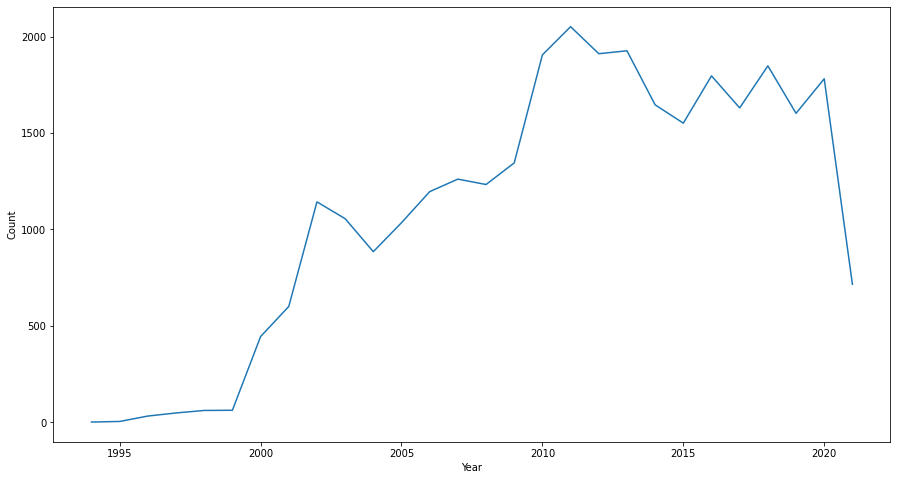

In [15]:
# game yang dirilis per tahun
df['year'] = pd.DatetimeIndex(df['date']).year
num_game_release = df.groupby('year').count()['titles'].reset_index()
num_game_release.columns = ['Year','Count']
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=num_game_release,x='Year',y='Count')
plt.show()

In [ ]:
# game terbanyak dirilis tahun 2011

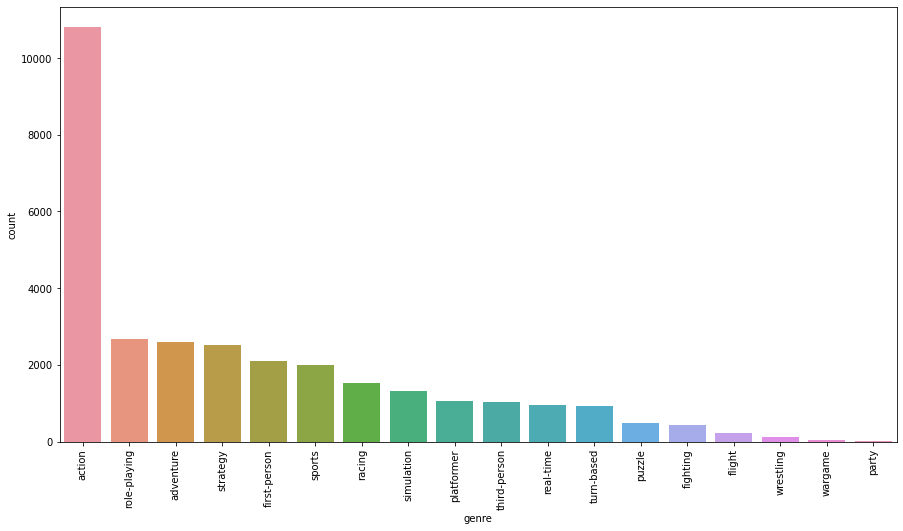

In [16]:
# distribusi game
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='genre',order=df['genre'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# genre paling populer adalah action dan paling tidak populer adalah party

In [18]:
# rerata metascore untuk tiap platform
meta_platform = df['metascore'].groupby(df['platforms']).mean().sort_values(ascending=False)
meta_platform

platforms
Nintendo 64           79.589474
iOS (Apple Arcade)    76.529412
iOS                   75.137165
Stadia                75.111111
PlayStation 5         74.954545
PlayStation           74.928571
Xbox Series X         74.253968
Dreamcast             73.940678
Wii U                 72.868914
PlayStation 3         72.751381
PC                    72.609118
Xbox One              72.588618
PlayStation Vita      72.303653
Xbox 360              72.196954
Xbox                  72.111549
Switch                71.634553
PlayStation 4         71.535206
GameCube              70.689243
3DS                   70.638507
PlayStation 2         70.433101
Game Boy Advance      70.243289
PSP                   69.482659
DS                    68.844937
Wii                   68.781127
Name: metascore, dtype: float64

In [ ]:
# game di konsol nintendo64 memiliki skor terbaik dan wii yang terburuk

In [26]:
# top 5 konsol
top5_platform_rating = meta_platform.head(5).index.to_list()
top5_platform_rating

['Nintendo 64', 'iOS (Apple Arcade)', 'iOS', 'Stadia', 'PlayStation 5']

In [27]:
# Jumlah game yang rilis di top 5 konsol
df[~df['platforms'].isin(top5_platform_rating)].count()['platforms']

26806

In [28]:
# Tahun rilis dan platform konsolnya
year_platform = df.groupby(['year','platforms']).count()
year_platform

titles  metascore  userscore  genre  date
year platforms                                                    
1994 PC                       2          2          1      2     2
1995 PC                       3          3          3      3     3
     PlayStation              2          2          1      2     2
1996 Nintendo 64              4          4          3      4     4
     PC                      24         24         21     24    24
...                         ...        ...        ...    ...   ...
2021 Switch                 198        193        177    198   198
     Xbox One                59         57         54     59    59
     Xbox Series X           33         32         28     33    33
     iOS                      8          8          8      8     8
     iOS (Apple Arcade)       6          6          6      6     6

[195 rows x 5 columns]

In [30]:
# jumlah game yang rilis di konsol/platform tahun 2014
year_platform.loc[2014,'titles'].sort_values(ascending=False)

platforms
PC                  453
iOS                 450
PlayStation 4       171
Xbox One            121
PlayStation 3       114
PlayStation Vita    102
Xbox 360             86
3DS                  77
Wii U                72
Name: titles, dtype: int64

In [31]:
# game pada platform PlayStation
playstation_df = df[df['platforms'].str.contains('PlayStation')]
playstation_df.head()

,titles,platforms,metascore,userscore,genre,date,year
2,Sniper Elite VR,PlayStation 4,75.0,tbd,action,2021-07-08,2021
8,Curved Space,PlayStation 5,56.0,tbd,action,2021-06-29,2021
12,Alex Kidd in Miracle World DX,PlayStation 4,62.0,6.4,action,2021-06-22,2021
14,Alex Kidd in Miracle World DX,PlayStation 5,67.0,NaN,action,2021-06-22,2021
19,Metro Exodus: Complete Edition,PlayStation 5,81.0,7.3,action,2021-06-18,2021


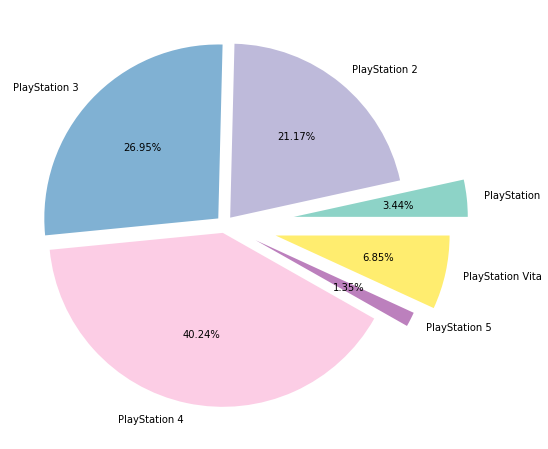

In [34]:
playstation_df.groupby('platforms').count()['titles'].plot.pie(autopct='%1.2f%%',figsize=(15,8),
                                                              explode = (0.4,0.05,0.05,0.05,0.2,0.3),startangle=0,cmap='Set3',
                                                             )
plt.ylabel("")
plt.show()

In [35]:
# Top 10 game PS
playstation_df.sort_values(by='metascore',ascending = False).head(10)

,titles,platforms,metascore,userscore,genre,date,year
26121,Tony Hawk's Pro Skater 2,PlayStation,98.0,7.4,sports,2000-09-20,2000
13812,Tekken 3,PlayStation,96.0,9.1,fighting,1998-04-29,1998
10777,Tekken 3,PlayStation,96.0,NaN,action,1998-04-29,1998
19206,Gran Turismo,PlayStation,96.0,8.7,racing,1998-04-30,1998
16634,LittleBigPlanet,PlayStation 3,95.0,6.8,platformer,2008-10-27,2008
6778,Portal 2,PlayStation 3,95.0,NaN,action,2011-04-19,2011
12511,The Last of Us,PlayStation 3,95.0,9.2,adventure,2013-06-14,2013
29289,Red Dead Redemption,PlayStation 3,95.0,8.9,third-person,2010-05-18,2010
15044,Portal 2,PlayStation 3,95.0,8.7,first-person,2011-04-19,2011
8311,LittleBigPlanet,PlayStation 3,95.0,6.8,action,2008-10-27,2008


In [ ]:
# top 10 game PS berasal dari tahun 1998-2013

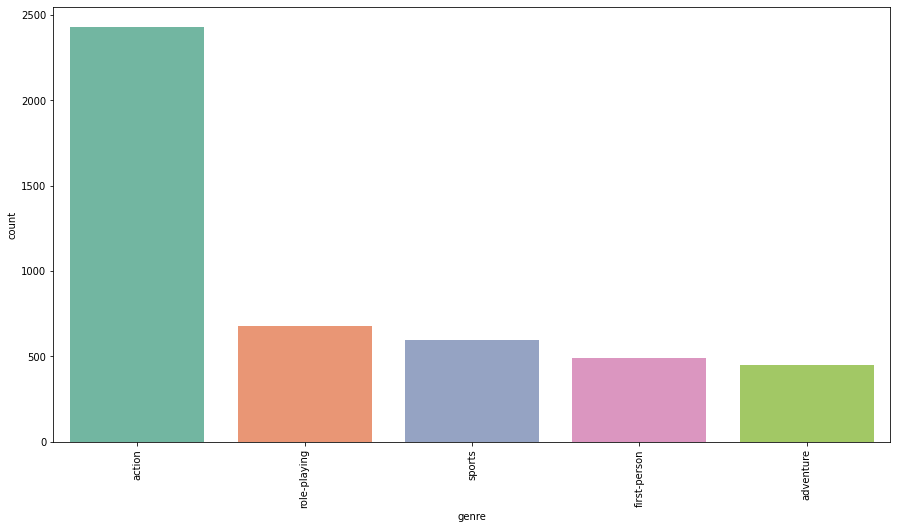

In [37]:
# Top 5 Genre PS
plt.figure(figsize=(15,8))
sns.countplot(data=playstation_df,x='genre',order=playstation_df['genre'].value_counts().iloc[:5].index,
             palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# genre paling populer di PS adalah action